In [11]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url='https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true'
df=pd.read_csv(url)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


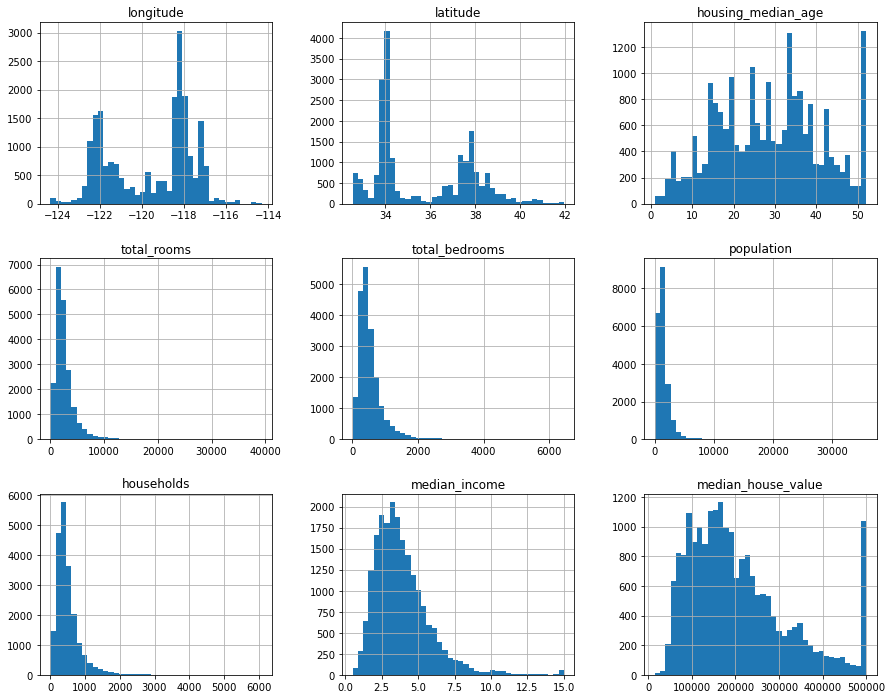

In [13]:
%matplotlib inline

df.hist(bins=40, figsize=(15,12))
plt.show()

In [108]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=56)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_categorical
8984,-118.44,33.99,44.0,305.0,72.0,156.0,70.0,5.9641,275000.0,<1H OCEAN,4
7435,-118.19,33.95,44.0,1436.0,271.0,850.0,269.0,3.2768,179100.0,<1H OCEAN,3
7882,-118.12,33.88,36.0,1083.0,218.0,557.0,210.0,3.0795,218400.0,<1H OCEAN,3
7341,-118.14,33.97,29.0,1846.0,530.0,2576.0,528.0,2.6300,156000.0,<1H OCEAN,2
10333,-117.75,33.83,14.0,2452.0,296.0,954.0,275.0,8.2375,388300.0,<1H OCEAN,5
...,...,...,...,...,...,...,...,...,...,...,...
9338,-122.61,37.99,40.0,7737.0,1488.0,3108.0,1349.0,4.4375,289600.0,NEAR OCEAN,3
13730,-117.18,34.04,41.0,1766.0,288.0,753.0,278.0,4.9125,140700.0,INLAND,4
3264,-123.07,39.12,24.0,1098.0,193.0,353.0,145.0,3.8333,92600.0,<1H OCEAN,3
399,-122.29,37.89,52.0,2269.0,380.0,1004.0,371.0,5.1696,261400.0,NEAR BAY,4


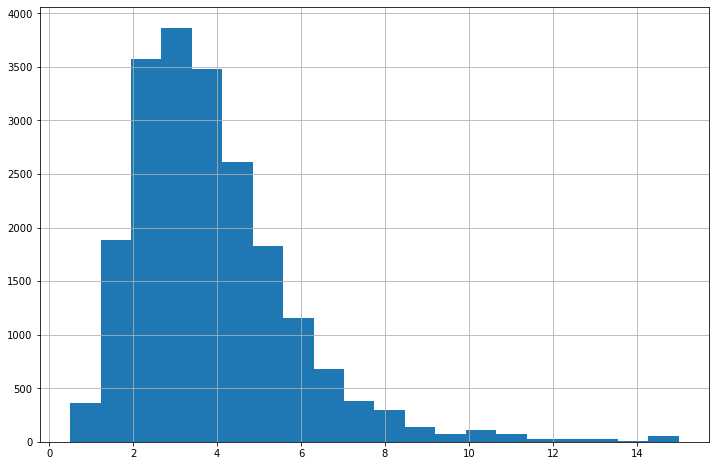

In [16]:
df['median_income'].hist(bins=20, figsize=(12,8))
plt.show()

# ko'rib turganimizdek balance yo'q, shu sababli biz StratifiedShuffleSplit  by sklearn.model_selection dan foydalanamiz

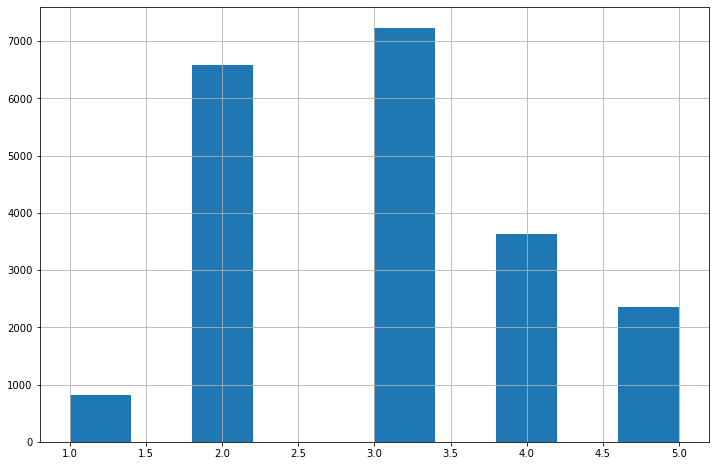

In [17]:
df['income_categorical']= pd.cut(df['median_income'], bins=[0., 1.5, 3., 4.5, 6., np.inf], labels=[1,2,3,4,5])
df['income_categorical'].hist(figsize=(12,8))
plt.show()

In [19]:
# StratifiedShuffleSplit yordamida matlumotlarni bo'lamiz

from sklearn.model_selection import StratifiedShuffleSplit

strat_split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=56)

for train_set_index, test_set_index in strat_split.split(df, df['income_categorical']):
    train_set_strat=df.loc[train_set_index]
    test_set_strat=df.loc[test_set_index]

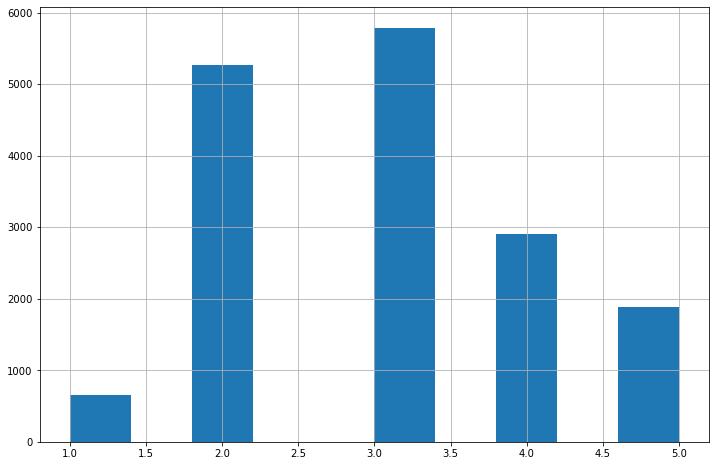

In [23]:
# balance saqlandimi yoki yoq tekshitib ko'ramiz ! 

train_set_strat['income_categorical'].hist(figsize=(12,8))
plt.show()

# korib turganimizdek balance saqlandi

In [96]:
# va income_categorical ustuni endi bizga kerak emas 

train_set_strat.drop('income_categorical', axis=1, inplace=True)
test_set_strat.drop('income_categorical', axis=1, inplace=True)

KeyError: "['income_categorical'] not found in axis"

In [97]:
x_train=train_set_strat.drop('median_house_value', axis=1)
y=train_set_strat['median_house_value']

In [27]:
# bizga qulay bo'lganligi tufayli ikkinchi yani train_set_strat by StratifiedShuffleSplit dan nusxa olib davome etamiz

housing=train_set_strat.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19300,-122.83,38.39,19.0,1765.0,394.0,868.0,388.0,2.4620,260300.0,<1H OCEAN
8590,-118.39,33.89,40.0,826.0,143.0,389.0,147.0,7.1845,438100.0,<1H OCEAN
2338,-119.68,36.83,11.0,2455.0,344.0,1110.0,339.0,6.1133,120000.0,INLAND
3729,-118.42,34.18,40.0,1013.0,150.0,449.0,166.0,5.7143,382400.0,<1H OCEAN
19362,-123.49,38.70,9.0,5409.0,1019.0,594.0,327.0,3.3125,295400.0,NEAR OCEAN


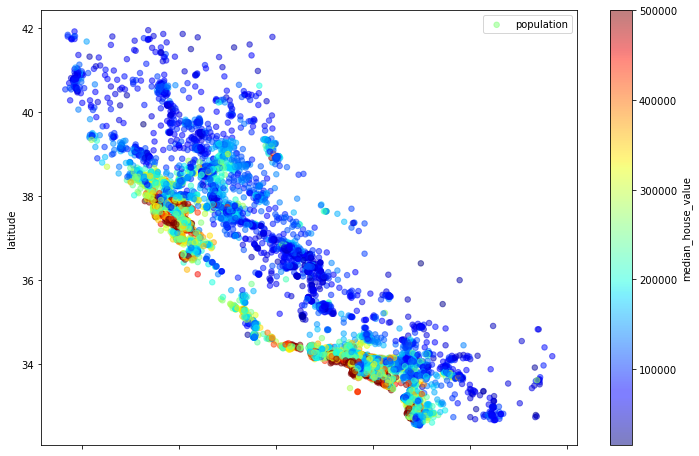

In [31]:
housing.plot(kind='scatter',
             x='longitude', 
             y='latitude', 
             figsize=(12,8),
             s=30,
             c='median_house_value',
             cmap='jet',
             colorbar=True,
             alpha=0.5,
             label='population'
            )

plt.show()

In [33]:
housing.corrwith(housing['median_house_value']).sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688608
total_rooms           0.134397
housing_median_age    0.098337
households            0.065369
total_bedrooms        0.049382
population           -0.023751
longitude            -0.042199
latitude             -0.145617
dtype: float64

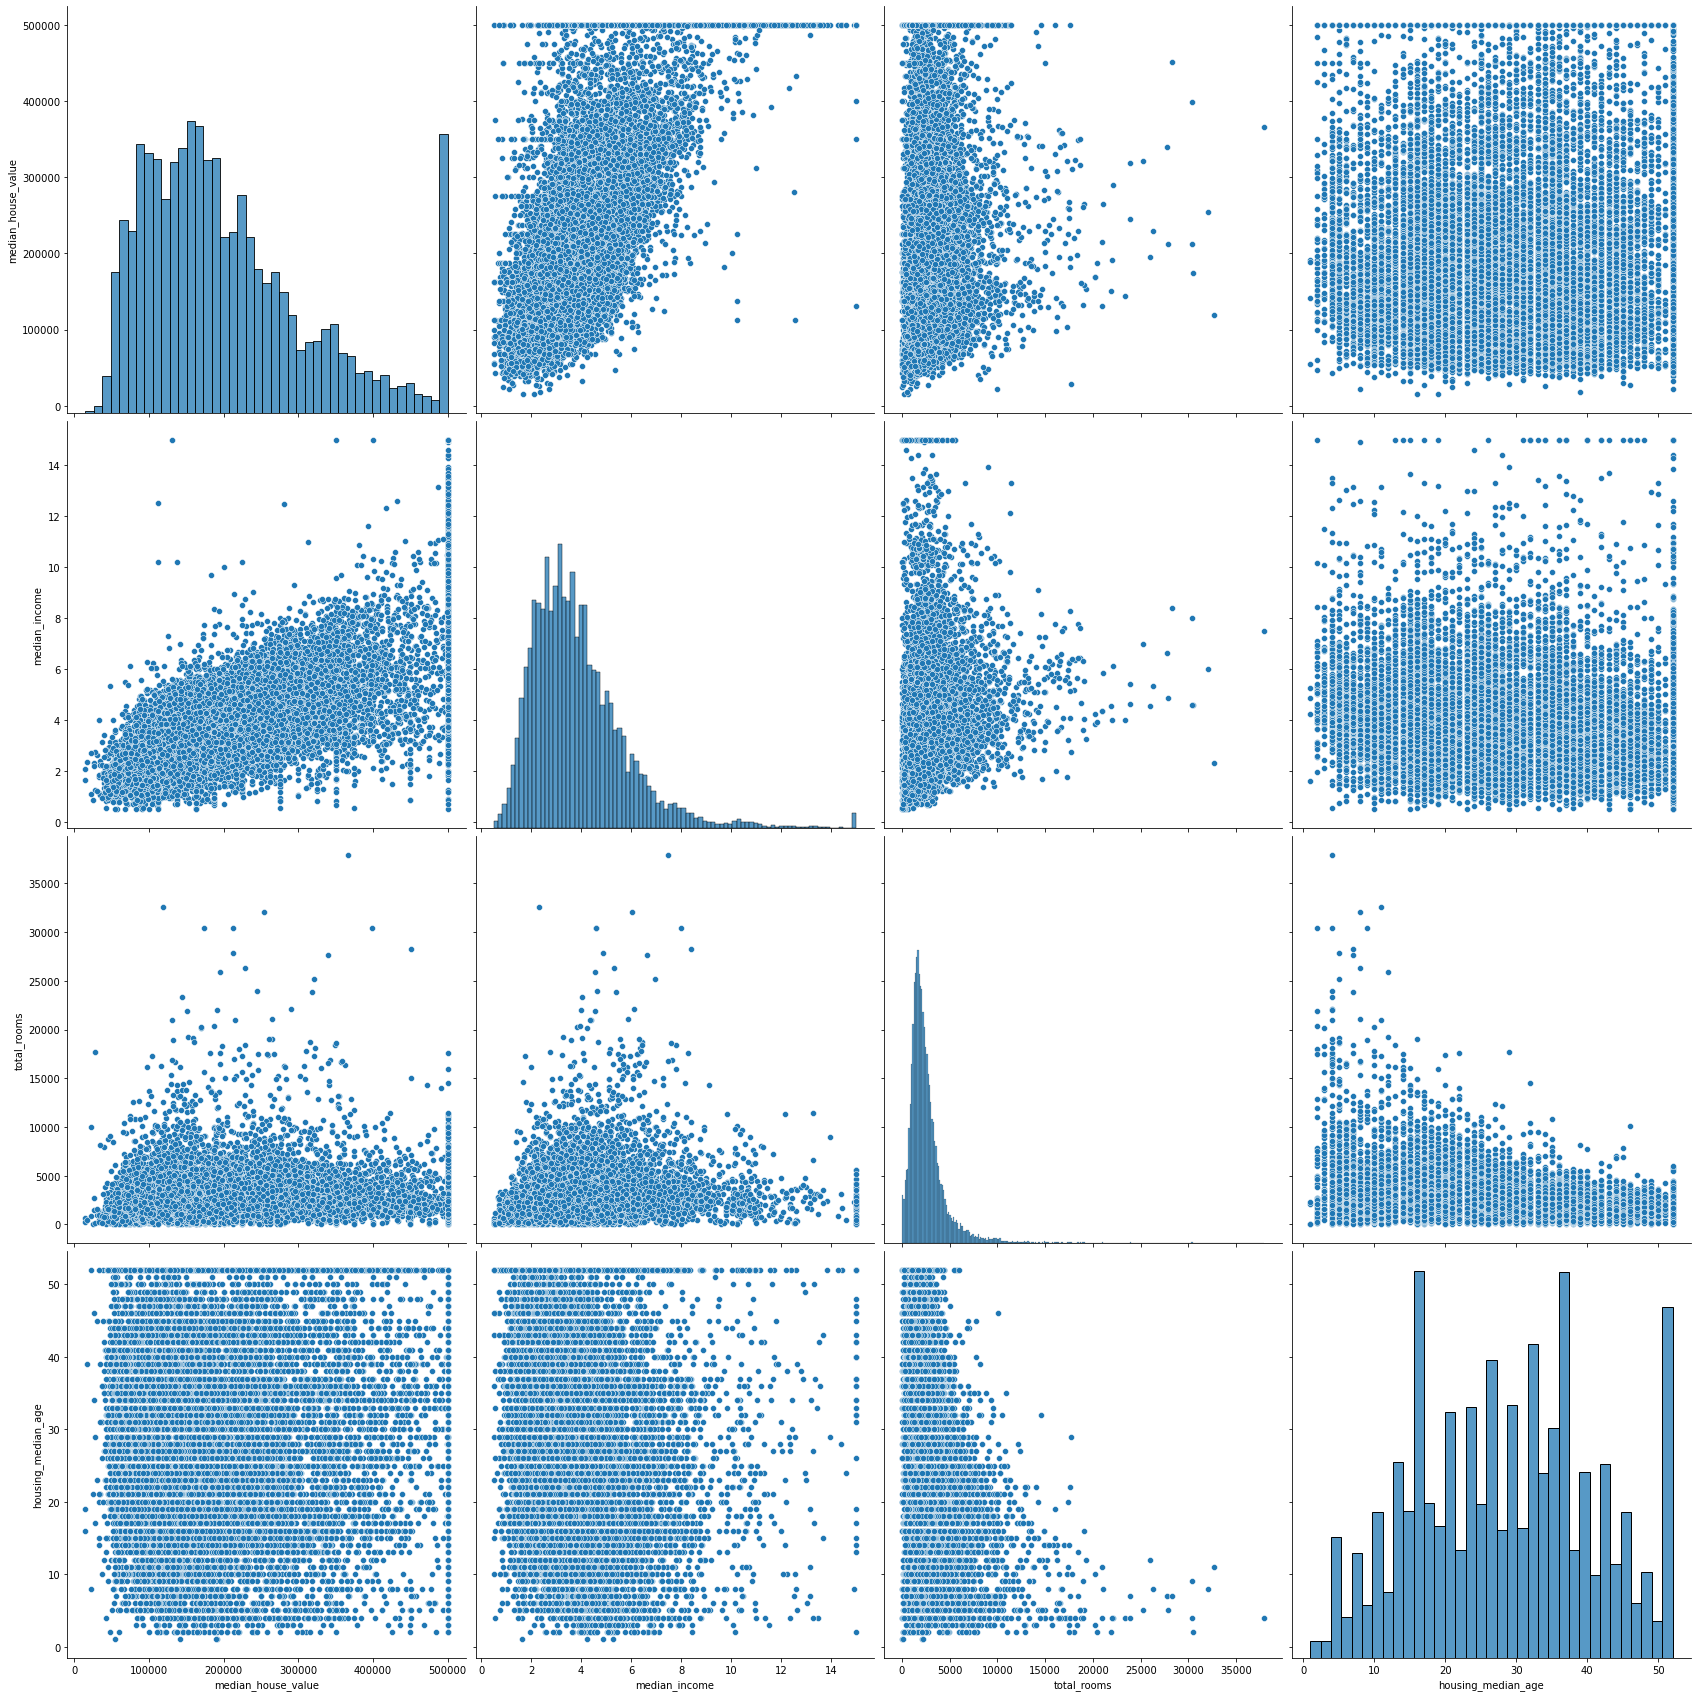

In [35]:
# shuningdek bog'liqlikni pairplot yordamida ham ko'rishimiz mumkin

column=['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
sns.pairplot(housing[column], height=6)
plt.show()

In [36]:
# Endi malumotalar bilan togridan togri emas balki funksiyalar bilan ishlaymiz, maqsadimiz uni avtomatlashtirish, 
# yangi malumotlar kelganda uni tayyor funksiya orqali tahlil qilish

In [88]:
housing= train_set_strat.drop('median_house_value', axis=1)
housing_label= train_set_strat['median_house_value'].copy()

In [38]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='median')

In [41]:
housing_numerical= housing.drop('ocean_proximity', axis=1)

imputer.fit(housing_numerical)

imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2122.5    ,  432.     ,
       1163.5    ,  408.     ,    3.54035])

In [47]:
X= imputer.transform(housing_numerical)
type(X)    # it is ndarray

numpy.ndarray

In [49]:
# olingan X natijani DataFrame ga o'tkazib qo'yamiz

housing_transform= pd.DataFrame(X, index=housing_numerical.index, columns=housing_numerical.columns)
housing_transform.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
19300,-122.83,38.39,19.0,1765.0,394.0,868.0,388.0,2.4620
8590,-118.39,33.89,40.0,826.0,143.0,389.0,147.0,7.1845
2338,-119.68,36.83,11.0,2455.0,344.0,1110.0,339.0,6.1133
3729,-118.42,34.18,40.0,1013.0,150.0,449.0,166.0,5.7143
19362,-123.49,38.70,9.0,5409.0,1019.0,594.0,327.0,3.3125


In [52]:
housing_transform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 19300 to 8515
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [58]:
# Endi matnli ustunlar bilan ishlaymiz

housing_cat= housing[['ocean_proximity']]
housing_cat

,ocean_proximity
19300,<1H OCEAN
8590,<1H OCEAN
2338,INLAND
3729,<1H OCEAN
19362,NEAR OCEAN
...,...
19479,INLAND
12222,INLAND
12619,INLAND
5320,<1H OCEAN


In [59]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder= OrdinalEncoder()
housing_cat_encoded= ord_encoder.fit_transform(housing_cat)
housing_cat_encoded[0:5]

array([[0.],
       [0.],
       [1.],
       [0.],
       [4.]])

In [61]:
from sklearn.preprocessing import OneHotEncoder
hot_encoder= OneHotEncoder()
housing_cat_1hot= hot_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [62]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
19300,-122.83,38.39,19.0,1765.0,394.0,868.0,388.0,2.4620,<1H OCEAN
8590,-118.39,33.89,40.0,826.0,143.0,389.0,147.0,7.1845,<1H OCEAN


In [70]:
# avtomatik ustun qo'shadigan transformer yasaymiz

from sklearn.base import BaseEstimator, TransformerMixin

room_ix, bedroom_ix, population_ix, household_ix= 3,4,5,6

class AttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedroom_per_room=True):
        self.add_bedroom_per_room=add_bedroom_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household= X[:, room_ix]/X[:,household_ix]
        population_per_household= X[:,population_ix]/X[:, household_ix]
        if self.add_bedroom_per_room:
            bedroom_per_room=X[:, bedroom_ix]/X[:, room_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedroom_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [73]:
attr_adder= AttributeAdder(add_bedroom_per_room=True)
housing_added_attr= attr_adder.transform(housing.values)
housing_added_attr[0,:]

array([-122.83, 38.39, 19.0, 1765.0, 394.0, 868.0, 388.0, 2.462,
       '<1H OCEAN', 4.548969072164948, 2.2371134020618557,
       0.22322946175637393], dtype=object)

In [74]:
# strandarizasiya va normalizasiya 

from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
min_max_scaler.fit_transform(housing_numerical)

array([[0.15139442, 0.62167906, 0.35294118, ..., 0.03021603, 0.06364085,
        0.13531537],
       [0.5936255 , 0.1434644 , 0.76470588, ..., 0.01344491, 0.02400921,
        0.46100054],
       [0.46513944, 0.45589798, 0.19607843, ..., 0.03868912, 0.05558296,
        0.38712569],
       ...,
       [0.27988048, 0.63443146, 0.31372549, ..., 0.1175379 , 0.24864332,
        0.25666543],
       [0.59063745, 0.16046759, 0.7254902 , ..., 0.05927664, 0.15392205,
        0.29865105],
       [0.60059761, 0.1445271 , 0.68627451, ..., 0.04341585, 0.06939648,
        0.25065172]])

In [75]:
from sklearn.preprocessing import StandardScaler
stan_scaler=StandardScaler()
stan_scaler.fit_transform(housing_numerical)

array([[-1.62523661,  1.28975808, -0.76505408, ..., -0.50004618,
        -0.2914831 , -0.74010465],
       [ 0.58977077, -0.81411382,  0.90432289, ..., -0.92951479,
        -0.91980802,  1.74043691],
       [-0.05377867,  0.56041582, -1.40100721, ..., -0.2830704 ,
        -0.41923381,  1.17777812],
       ...,
       [-0.98168717,  1.34586133, -0.92404236, ...,  1.73605967,
         2.64156892,  0.1841433 ],
       [ 0.5748045 , -0.73930949,  0.7453346 , ...,  0.24412698,
         1.13984629,  0.50392174],
       [ 0.62469205, -0.80943855,  0.58634632, ..., -0.16203018,
        -0.20023259,  0.1383406 ]])

In [77]:
pd.get_dummies(housing['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19300,1,0,0,0,0
8590,1,0,0,0,0
2338,0,1,0,0,0
3729,1,0,0,0,0
19362,0,0,0,0,1
...,...,...,...,...,...
19479,0,1,0,0,0
12222,0,1,0,0,0
12619,0,1,0,0,0
5320,1,0,0,0,0


In [78]:
from sklearn.pipeline import Pipeline

num_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('attr_adder', AttributeAdder(add_bedroom_per_room=True))
])

In [84]:
from sklearn.compose import ColumnTransformer

num_attrb=list(housing_numerical)
cat_attrb=['ocean_proximity']

full_pipeline= ColumnTransformer([
    ('numerical', num_pipeline, num_attrb),
    ('categorical', OneHotEncoder(), cat_attrb)
])

In [86]:
housing_prepared= full_pipeline.fit_transform(housing)
housing_prepared[0:5,:]

array([[-1.62523661,  1.28975808, -0.76505408, -0.39860074, -0.33958609,
        -0.50004618, -0.2914831 , -0.74010465,  1.36749179,  1.71552378,
         0.85194545,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.58977077, -0.81411382,  0.90432289, -0.82744102, -0.93674013,
        -0.92951479, -0.91980802,  1.74043691,  0.89958014,  1.01055304,
         1.13209293,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.05377867,  0.56041582, -1.40100721, -0.08347849, -0.45854108,
        -0.2830704 , -0.41923381,  1.17777812,  0.19912156,  0.67520889,
         5.49292503,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.5748045 , -0.67853097,  0.90432289, -0.74203833, -0.92008643,
        -0.87571914, -0.87027203,  0.96819928,  0.85265101,  1.00625909,
         1.23994462,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.95449447,  1.43469148, -1

In [125]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
19300,-122.83,38.39,19.0,1765.0,394.0,868.0,388.0,2.4620,<1H OCEAN
8590,-118.39,33.89,40.0,826.0,143.0,389.0,147.0,7.1845,<1H OCEAN
2338,-119.68,36.83,11.0,2455.0,344.0,1110.0,339.0,6.1133,INLAND
3729,-118.42,34.18,40.0,1013.0,150.0,449.0,166.0,5.7143,<1H OCEAN
19362,-123.49,38.70,9.0,5409.0,1019.0,594.0,327.0,3.3125,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
19479,-120.96,37.66,15.0,2485.0,434.0,1296.0,434.0,3.8542,INLAND
12222,-116.91,33.71,19.0,6807.0,1164.0,2703.0,1055.0,3.1591,INLAND
12619,-121.54,38.51,17.0,8482.0,1590.0,3362.0,1513.0,4.2216,INLAND
5320,-118.42,34.05,38.0,4888.0,1126.0,1698.0,937.0,4.8304,<1H OCEAN


In [89]:
# Machine Learning  bo'limi

from sklearn.linear_model import LinearRegression

Lr_reg=LinearRegression()

Lr_reg.fit(housing_prepared, housing_label )

LinearRegression()

In [104]:
# aniqligini sinab ko'ramiz. 5 ta ixtiyoriy qiymat olib modelimizdan o'tkazib ko'ramiz

test_data=x_train.sample(5)
test_data_label=y.loc[test_data.index]
test_data_prepared=full_pipeline.transform(test_data)
predicted_data=Lr_reg.predict(test_data_prepared)


In [106]:
pd.DataFrame({'prognoz': predicted_data, 'label': test_data_label})

,prognoz,label
9527,175347.499757,120800.0
14486,555340.618115,500001.0
17257,203101.865720,226500.0
6849,258673.669634,253800.0
15696,191597.564652,425000.0


In [117]:
# Modelni baholab ko'ramiz

x_test_set= test_set.drop(['median_house_value', 'income_categorical'], axis=1)
y_test_set= test_set['median_house_value'].copy()

x_test_prep=full_pipeline.transform(x_test_set)
y_predicted=Lr_reg.predict(x_test_prep)

In [122]:
y_predicted.mean()

205087.4034807106

In [129]:
from sklearn.metrics import mean_squared_error
mse_model=mean_squared_error(y_test_set, y_predicted)
lin_mse=np.sqrt(mse_model)
print(lin_mse)

70538.5340785427


In [131]:
import pickle

with open('MSE_model.pkl', 'wb') as file:
    pickle.dump(mse_model, file)

In [134]:
import joblib

joblib.dump(mse_model, 'MSE_model_same.jlb')

['MSE_model_same.jlb']